### HR ANALYSIS: Data science job change
1.Problem statement: Company wants to know how many people are willing to continue job
2.Type of problem: Classification, Supervised learning
3.Performance Measures: Accuracy, Precision, Recall, Confusion Matrix


## Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression 
3. SVM Classifier
4. Decision Tree
5. Random Forest
6. XGBoost
7. Gradient boosting
8. Adaboosting

### 1. Import the libraries required to perform task 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 2.Import the datasets

In [2]:
df = pd.read_csv("aug_train.csv")

##### The head() function is used to get first 5 rows of the data

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### 3. EDA  & Data preprocessing

##### The df.shape function is used to show the shape of the data

In [5]:
df.shape

(19158, 14)

##### The df.info  function is used to information of the data like datatypes,memory usage etc as listed below

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Dealing with nan values

#### Now check any null values present in the given data

In [7]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
percent_null = df.isna().sum()/df.shape[0]*100
percent_null

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

#### Columns in which we have 2% or less than 2% null values we can drop those null values

In [9]:
df.dropna(subset = ["enrolled_university","education_level","last_new_job","experience"],axis=0,inplace = True)

In [10]:
df.shape

(18014, 14)

#### Filling the null values with mode

In [11]:
col_mode = ['gender','company_size','major_discipline','company_type']
for i in col_mode:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [12]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### converting categorical data into numeric values

#### Fit.transform - Fit label encoder and return encoded labels.

In [13]:
df['city']=LabelEncoder().fit_transform(df['city'])
df['gender']=LabelEncoder().fit_transform(df['gender'])
df['relevent_experience']=LabelEncoder().fit_transform(df['relevent_experience'])
df['enrolled_university']=LabelEncoder().fit_transform(df['enrolled_university'])
df['education_level']=LabelEncoder().fit_transform(df['education_level'])
df['major_discipline']=LabelEncoder().fit_transform(df['major_discipline'])
df['experience']=LabelEncoder().fit_transform(df['experience'])
df['company_size']=LabelEncoder().fit_transform(df['company_size'])
df['company_type']=LabelEncoder().fit_transform(df['company_type'])
df['last_new_job']=LabelEncoder().fit_transform(df['last_new_job'])

In [14]:
df.describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000,18014.000000
mean,16903.699734,43.989175,0.831728,0.942656,0.267792,1.545742,0.706395,4.707172,12.921061,3.339625,4.480959,1.754968,65.347896,0.245420
std,9665.557267,35.576195,0.122115,0.270679,0.442821,0.799010,1.001806,0.968508,6.627446,1.795647,1.304753,1.920453,60.059220,0.430348
min,1.000000,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8528.750000,5.000000,0.745000,1.000000,0.000000,1.000000,0.000000,5.000000,7.000000,2.000000,5.000000,0.000000,23.000000,0.000000
50%,17012.500000,48.000000,0.910000,1.000000,0.000000,2.000000,0.000000,5.000000,14.000000,4.000000,5.000000,1.000000,47.000000,0.000000
75%,25326.250000,64.000000,0.920000,1.000000,1.000000,2.000000,2.000000,5.000000,19.000000,4.000000,5.000000,4.000000,88.000000,0.000000
max,33380.000000,122.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,7.000000,5.000000,5.000000,336.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  int32  
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  int32  
 4   relevent_experience     18014 non-null  int32  
 5   enrolled_university     18014 non-null  int32  
 6   education_level         18014 non-null  int32  
 7   major_discipline        18014 non-null  int32  
 8   experience              18014 non-null  int32  
 9   company_size            18014 non-null  int32  
 10  company_type            18014 non-null  int32  
 11  last_new_job            18014 non-null  int32  
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int32(10), int64(2)
mem

In [16]:
df.to_csv('df.csv')

### 4. Data Visualizaton

#### Which gender is more likely to move for a new job?

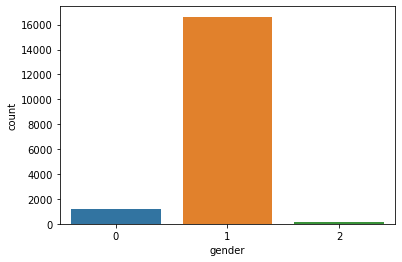

In [17]:
sns.countplot(df['gender'])

Text(0.5, 1.0, 'Gender % looking for new job')

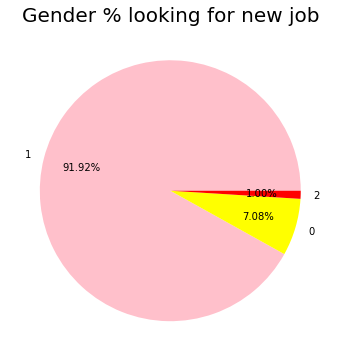

In [17]:
gender = df[df['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(6,6))
plt.pie(x = temp, labels = labels , colors = ['pink','yellow','red'], autopct="%.2f%%",pctdistance=0.7)
plt.title('Gender % looking for new job', fontsize=20)

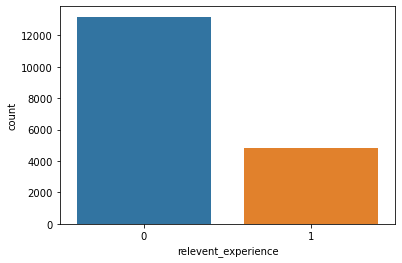

In [18]:
sns.countplot(df['relevent_experience'])

<Figure size 720x360 with 0 Axes>

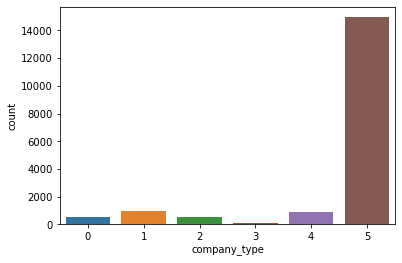

<Figure size 720x360 with 0 Axes>

In [19]:
sns.countplot(df['company_type'])
plt.figure(figsize=(10,5))

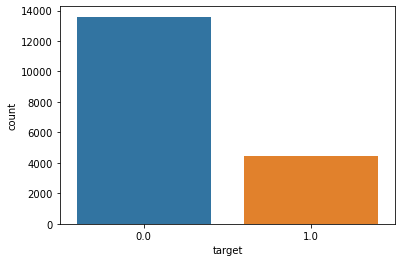

In [22]:
sns.countplot(df['target'])

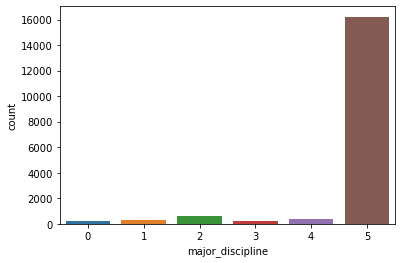

In [23]:
sns.countplot(df['major_discipline'])

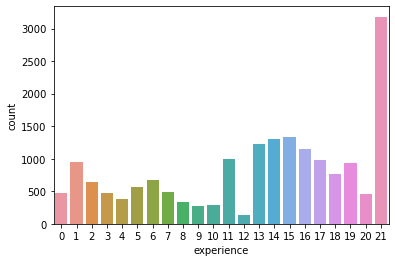

In [24]:
sns.countplot(df['experience'])

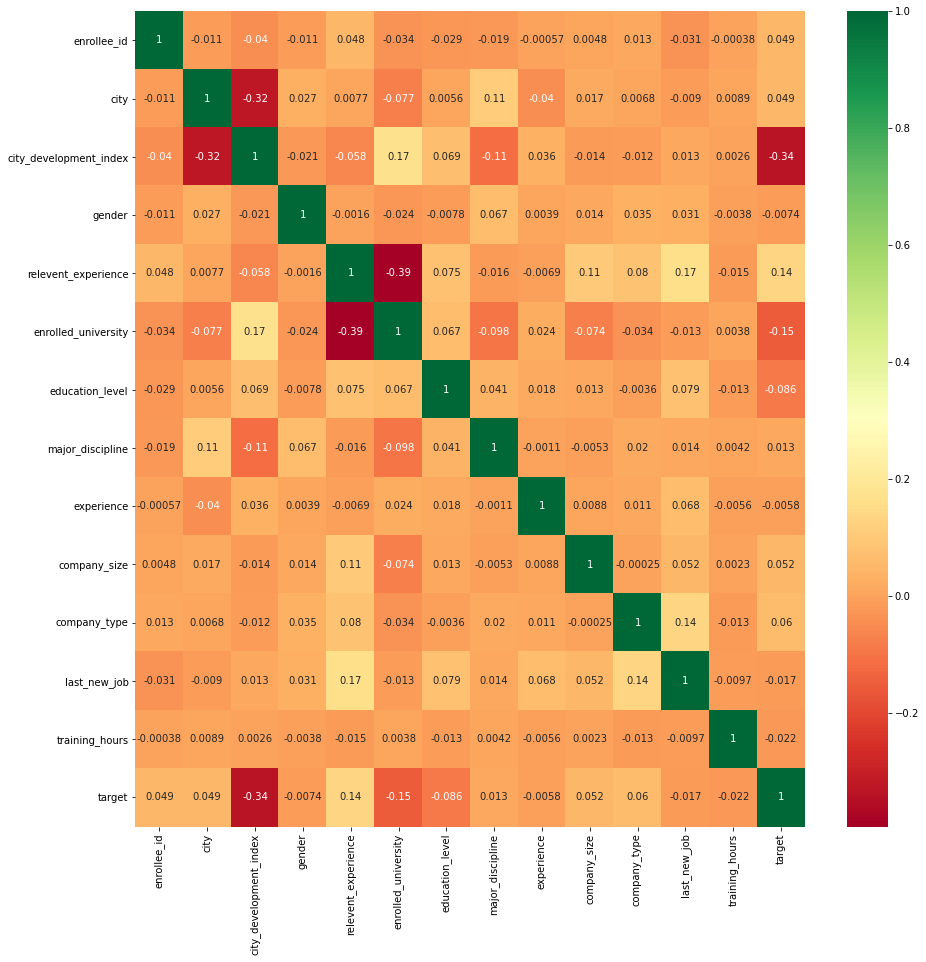

In [63]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

### 5.Model building

#### Splitting the target values(dependent variables) and features(independent variables)

In [26]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20)

#### Standardize features by removing the mean and scaling to unit variance

In [28]:
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)


### Performing KNN

In [29]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

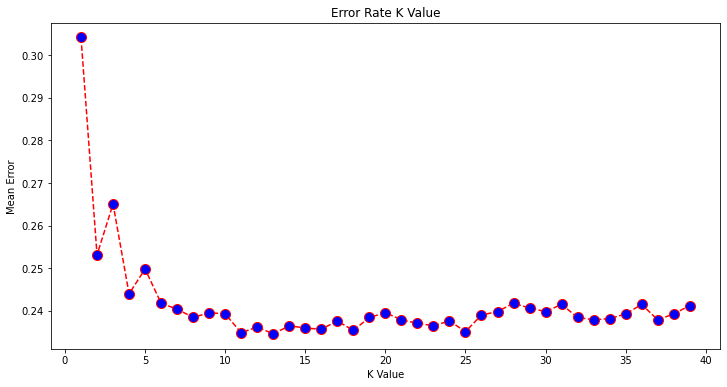

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [31]:
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [32]:
accuracy_score(Y_test,y_pred)

0.7624202053844019

#### By performing Knn i got 76% accuracy which is not bad,lets perform other classification methods to get better accuracy

### Performing pipelines to get faster results

In [33]:

pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])
pipeline_dT=Pipeline([ ('dT_classifier',DecisionTreeClassifier(random_state=42))])
pipeline_Rf=Pipeline([('Rf_classifier',RandomForestClassifier())])
pipeline_svc=Pipeline([('svc',SVC())])
pipelines = [pipeline_lr, pipeline_dT, pipeline_Rf, pipeline_svc]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

In [34]:
for pipes in pipelines:
    pipes.fit(X_train,Y_train)

In [35]:
cv_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,Y_train, cv=10 )
    cv_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.768302 
Decision Tree: 0.704184 
RandomForest: 0.771424 
SVC: 0.775172 


#### Random forest & SVM gave me more accuracy

#### performing ensamble techniques to increase accuracy

In [37]:
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7635303913405496

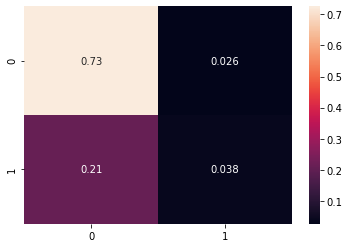

In [39]:
cf=confusion_matrix(Y_test,y_pred)
sns.heatmap(cf/np.sum(cf),annot=True)

In [41]:
clf = AdaBoostClassifier(n_estimators=200)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7601998334721066

In [49]:
from xgboost import XGBClassifier

In [57]:
import warnings

In [58]:
clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weigh= 1,
 subsample= 0.6)

clf.fit(X_train, Y_train)

[22:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [59]:

clf.fit(X_train, Y_train)

[22:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [60]:

y_pred = clf.predict(X_test)
accuracy_score(Y_test, y_pred)

0.768526228143214

# Final Accuracies
    1. KNN                   0.762420 
    2. Logistic Regression:  0.768302 
    3. Decision Tree:        0.704184 
    4. RandomForest:         0.771424 
    5. SVC:                  0.775172
    6. GradientBoosting      0.763530
    7. AdaBoostClassifier    0.760199
    6. XGBOOST               0.768526